In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans

In [3]:
stocks_df = pd.read_csv('https://assets.datacamp.com/production/repositories/655/datasets/1304e66b1f9799e1a5eac046ef75cf57bb1dd630/company-stock-movements-2010-2015-incl.csv')

In [4]:
stocks_df.head()

,Unnamed: 0,2010-01-04,2010-01-05,2010-01-06,2010-01-07,2010-01-08,2010-01-11,2010-01-12,2010-01-13,2010-01-14,...,2013-10-16,2013-10-17,2013-10-18,2013-10-21,2013-10-22,2013-10-23,2013-10-24,2013-10-25,2013-10-28,2013-10-29
0,Apple,0.580000,-0.220005,-3.409998,-1.170000,1.680011,-2.689994,-1.469994,2.779997,-0.680003,...,0.320008,4.519997,2.899987,9.590019,-6.540016,5.959976,6.910011,-5.359962,0.840019,-19.589981
1,AIG,-0.640002,-0.650000,-0.210001,-0.420000,0.710001,-0.200001,-1.130001,0.069999,-0.119999,...,0.919998,0.709999,0.119999,-0.480000,0.010002,-0.279998,-0.190003,-0.040001,-0.400002,0.660000
2,Amazon,-2.350006,1.260009,-2.350006,-2.009995,2.960006,-2.309997,-1.640007,1.209999,-1.790001,...,2.109985,3.699982,9.570008,-3.450013,4.820008,-4.079986,2.579986,4.790009,-1.760009,3.740021
3,American express,0.109997,0.000000,0.260002,0.720002,0.190003,-0.270001,0.750000,0.300004,0.639999,...,0.680001,2.290001,0.409996,-0.069999,0.100006,0.069999,0.130005,1.849999,0.040001,0.540001
4,Boeing,0.459999,1.770000,1.549999,2.690003,0.059997,-1.080002,0.360000,0.549999,0.530002,...,1.559997,2.480003,0.019997,-1.220001,0.480003,3.020004,-0.029999,1.940002,1.130005,0.309998


In [5]:
movements = stocks_df.iloc[:,1:]

In [6]:
companies=stocks_df.iloc[:,0]

In [7]:
companies_list = companies.to_list()

In [8]:
kmeans = KMeans(n_clusters =10)
kmeans.fit(movements)
labels = kmeans.predict(movements)
stocks_cluster = pd.DataFrame({'labels':labels,'companies':companies_list})
stocks_cluster_sorted = stocks_cluster.sort_values(by=['labels'])
stocks_cluster_sorted[stocks_cluster_sorted['labels']==0]['companies'].to_list()

['3M',
 'Exxon',
 'Navistar',
 'American express',
 'Schlumberger',
 'DuPont de Nemours',
 'Chevron',
 'ConocoPhillips']

In [9]:
normalizer= Normalizer()
kmeans = KMeans(n_clusters =10)
pipeline = make_pipeline(normalizer,kmeans)
pipeline.fit(movements)

Pipeline(steps=[('normalizer', Normalizer()),
                ('kmeans', KMeans(n_clusters=10))])

In [10]:
labels = pipeline.predict(movements)

In [11]:
stocks_cluster = pd.DataFrame({'labels':labels,'companies':companies_list})

In [12]:
stocks_cluster_sorted = stocks_cluster.sort_values(by=['labels'])

In [13]:
stocks_cluster_sorted[stocks_cluster_sorted['labels']==0]['companies'].to_list()

['Yahoo',
 'Mitsubishi',
 'Sony',
 'MasterCard',
 'Toyota',
 'Taiwan Semiconductor Manufacturing',
 'Canon',
 'Honda']

In [14]:
stocks_df.head()

,Unnamed: 0,2010-01-04,2010-01-05,2010-01-06,2010-01-07,2010-01-08,2010-01-11,2010-01-12,2010-01-13,2010-01-14,...,2013-10-16,2013-10-17,2013-10-18,2013-10-21,2013-10-22,2013-10-23,2013-10-24,2013-10-25,2013-10-28,2013-10-29
0,Apple,0.580000,-0.220005,-3.409998,-1.170000,1.680011,-2.689994,-1.469994,2.779997,-0.680003,...,0.320008,4.519997,2.899987,9.590019,-6.540016,5.959976,6.910011,-5.359962,0.840019,-19.589981
1,AIG,-0.640002,-0.650000,-0.210001,-0.420000,0.710001,-0.200001,-1.130001,0.069999,-0.119999,...,0.919998,0.709999,0.119999,-0.480000,0.010002,-0.279998,-0.190003,-0.040001,-0.400002,0.660000
2,Amazon,-2.350006,1.260009,-2.350006,-2.009995,2.960006,-2.309997,-1.640007,1.209999,-1.790001,...,2.109985,3.699982,9.570008,-3.450013,4.820008,-4.079986,2.579986,4.790009,-1.760009,3.740021
3,American express,0.109997,0.000000,0.260002,0.720002,0.190003,-0.270001,0.750000,0.300004,0.639999,...,0.680001,2.290001,0.409996,-0.069999,0.100006,0.069999,0.130005,1.849999,0.040001,0.540001
4,Boeing,0.459999,1.770000,1.549999,2.690003,0.059997,-1.080002,0.360000,0.549999,0.530002,...,1.559997,2.480003,0.019997,-1.220001,0.480003,3.020004,-0.029999,1.940002,1.130005,0.309998


In [15]:
movements = stocks_df.iloc[:,1:]

In [16]:
from sklearn.preprocessing import normalize
from scipy.cluster.hierarchy import linkage, dendrogram
normalized_movements = normalize(movements)

In [17]:
mergings = linkage(normalized_movements,method='complete')

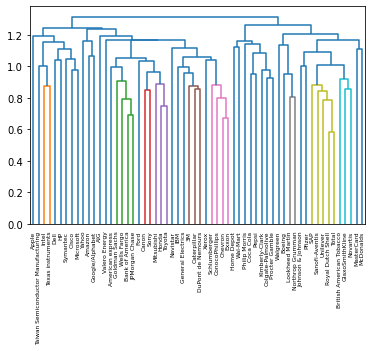

In [18]:
dendrogram(mergings,labels=companies_list,leaf_rotation=90,leaf_font_size=6)
plt.show()

In [19]:
from scipy.cluster.hierarchy import fcluster
labels = fcluster(mergings,1.2,criterion='distance')

In [20]:
df = pd.DataFrame({'labels':labels,'companies':companies_list})

In [21]:
df.head()

,labels,companies
0,1,Apple
1,3,AIG
2,2,Amazon
3,3,American express
4,5,Boeing


In [22]:
ct = pd.crosstab(df['labels'],df['companies'])

In [27]:
print(ct.head(1))

companies  3M  AIG  Amazon  American express  Apple  Bank of America  Boeing  \
labels                                                                         
1           0    0       0                 0      1                0       0   

companies  British American Tobacco  Canon  Caterpillar  ...  \
labels                                                   ...   
1                                 0      0            0  ...   

companies  Texas instruments  Total  Toyota  Unilever  Valero Energy  \
labels                                                                 
1                          1      0       0         0              0   

companies  Wal-Mart  Walgreen  Wells Fargo  Xerox  Yahoo  
labels                                                    
1                 0         0            0      0      0  

[1 rows x 60 columns]


In [35]:
ct_ind = ct.reset_index()

In [44]:
ct_ind[ct_ind['labels']==1].iloc[:,1:]

companies,3M,AIG,Amazon,American express,Apple,Bank of America,Boeing,British American Tobacco,Canon,Caterpillar,...,Texas instruments,Total,Toyota,Unilever,Valero Energy,Wal-Mart,Walgreen,Wells Fargo,Xerox,Yahoo
0,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [46]:
normalized_movements = normalize(movements)

In [47]:
from sklearn.manifold import TSNE
model = TSNE(learning_rate=50)
tsne_features = model.fit_transform(normalized_movements)

c:\users\akhil_s_bhat\appdata\local\programs\python\python39\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


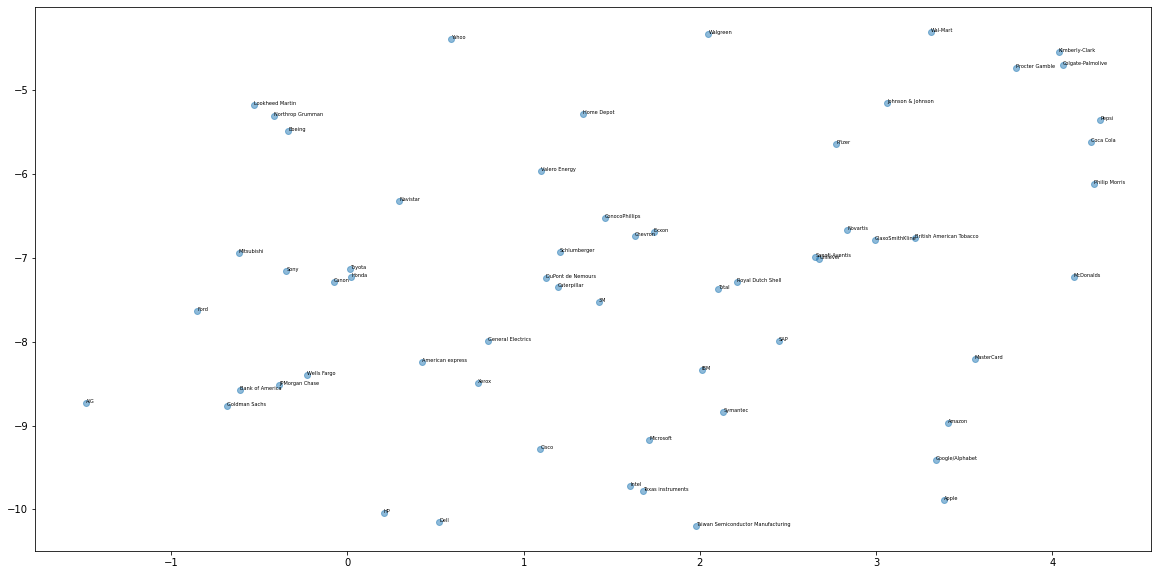

In [59]:
xs = tsne_features[:,0]
ys = tsne_features[:,1]
plt.figure(figsize=(20,10))
plt.scatter(xs,ys,alpha=0.5)
for x,y,company in zip(xs,ys,companies):
    plt.annotate(company, (x,y),fontsize=5)

In [60]:
movements = stocks_df.iloc[:,1:]
companies_list = companies.to_list()